# 7장 확률분포

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## #.이산확률분포

### 이산확률변수에서 다룬 내용(함수)
-예: 주사위를 던졌을 때 5또는 6이 나오는 경우 

- 상태공간

In [2]:
# ex:두 주사위 눈이 차의 절대값
d1 = [1,2,3,4,5,6]
d2 = [1,2,3,4,5,6]

X = list()
for i in d1:
    for j in d2:
        X.append(abs(i-j))
        
x_set = np.array(list(set(X)))

- 확률질량함수: f(x)

In [3]:
def f(x):
    cnt = 0
    for i in d1:
        for j in d2:
            if abs(i-j) == x:
                cnt += 1
    return cnt / (len(d1)*len(d2))

- 확률변수

In [4]:
X = [x_set, f]

-  확률

In [5]:
prob = np.array([ f(x_k) for x_k in x_set])

---------------------------------------------------------------------

- 평균=기대값(E(X))

In [6]:
def E(X):
    x_set, f = X
    return np.sum([x_k * f(x_k) for x_k in x_set])

In [7]:
#g(x) 함수식 사용
def E(X, g=lambda x:x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

- 분산(V(X))

In [8]:
def V(X):
    x_set, f = X
    mean = E(X)
    return np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

In [9]:
#g(x) 함수식 사용
def V(X, g=lambda x:x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

- 확률을 이용한 기대값과 분산 출력

In [10]:
def check_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set])  
    
    print(f'기대값 E(X): {E(X):.4}')
    print(f'분산   V(X): {V(X):.4}')

- 확률분포 그래프

In [11]:
def plot_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set]) 
    
    fig = plt.figure(figsize=(10,6))
    ax  = fig.add_subplot(111) # (1,1,1)
    
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', colors='red') #기대값:평균
    ax.set_xticks(np.append(x_set, E(X)))  #x축의 값 출력
    ax.set_ylim(0, prob.max()*1.2)         #y축의 한계 지정
    ax.legend()
    
    plt.show()    

### 1.베르누이 분포(Bernoulli distribution)


In [14]:
def Bern(p):
    x_set = np.array([0,1])
    
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else:
            return 0

    return x_set, f

In [15]:
p = 1/3
X = Bern(p)
X

0.3333333333333333


(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

- 평균(기대값)과 분산

In [33]:
check_prob(X)

기대값 E(X): 0.3333
분산   V(X): 0.2222


- 확률변수 X 그래프

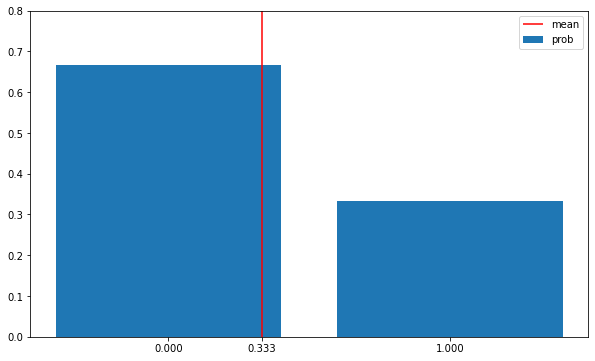

In [34]:
plot_prob(X)

### 2.이항분포(binomial distributuin)

In [26]:
#scipy패키지의 special모듈에 있는 comb함수 사용
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
        
    return x_set, f

In [44]:
n = 5    # n의 개수를 크게 해보기 --> 그래프가 종모양으로 변경됨
p = 0.25   # 0.3, 0.5, 0.7 변경해보기
X = Bin(n,p)
X

(array([0, 1, 2, 3, 4, 5]), <function __main__.Bin.<locals>.f(x)>)

In [45]:
# 기대값과 분산
check_prob(X)

기대값 E(X): 1.25
분산   V(X): 0.9375


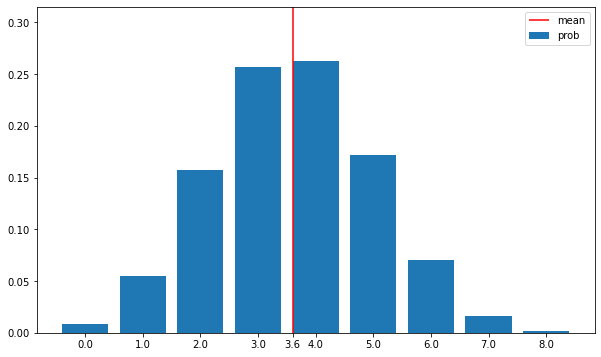

In [31]:
# 그래프
plot_prob(X)

- [예제]  이항분포 확률 구하기

최근의 한 통계에 의하면 우리나라 고등학생 중 40%가 담배를 피운다고 조사되었다. 만약 6명의 고등학생을 무작위로 추출한다면, 그 중에서 3명이 담배를 피울 확률을 구하시오

In [49]:
def prob(n, p, x):    
    return comb(n,x) * p**x * (1-p)**(n-x)
    
n = 6
p = 0.4
x = 3
prob(n, p, x)

0.27648

#### * scipy.stats에 있는 이항분포의 (binom)함수 사용하기

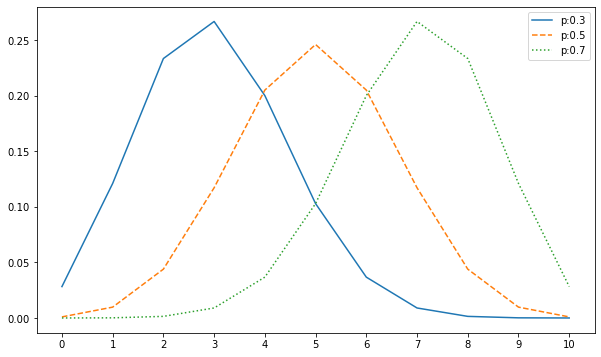

In [39]:
#여러 확률에 대한 이항분포를 비교하기 위해 선그래프로 나타내기
from scipy import stats

fig = plt.figure(figsize=(10,6))
ax  = fig.add_subplot(111) # (1,1,1)

n = 10
linestyles = ['-','--',':']


x_set = np.arange(n+1)
p = [0.3,0.5,0.7]

for p, ls in zip(p, linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', linestyle=ls)

ax.set_xticks(x_set)
ax.legend()
    
plt.show()

### 3.기하분포(geometric distributuin)

In [52]:
def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

In [53]:
p = 0.5
X = Ge(p)

In [54]:
#기대값과 분산
check_prob(X)

기대값 E(X): 2.0
분산   V(X): 2.0


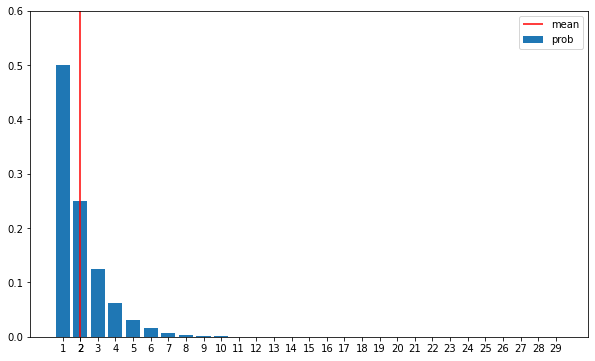

In [55]:
#그래프
plot_prob(X)

#### * scipy.stats에 있는 기하분포의 (geom)함수 사용하기

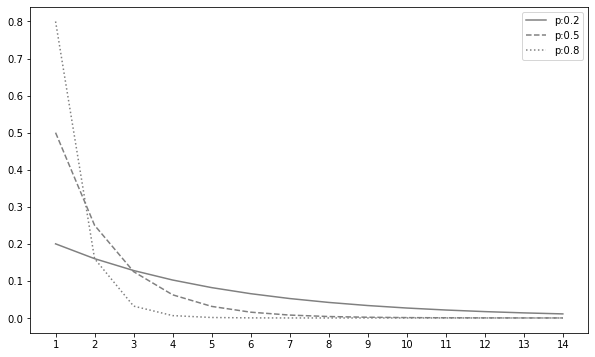

In [51]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

### 4.포하송 분포(poisson distributuin)

In [57]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [58]:
lam = 3
X = Poi(lam)

In [59]:
#기대값과 분산
check_prob(X)

기대값 E(X): 3.0
분산   V(X): 3.0


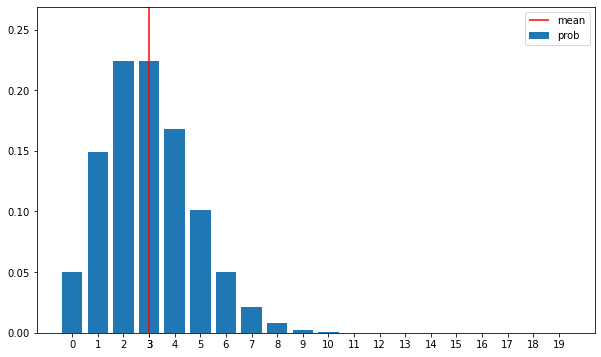

In [60]:
#그래프
plot_prob(X)

#### * scipy.stats에 있는 기하분포의 (poisson)함수 사용하기

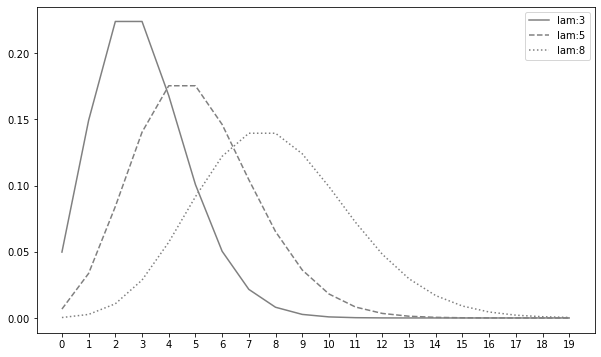

In [61]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'lam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

## 2.연속확률분포

### 연속확률변수에서 다룬 내용(함수)

- 상태구간

In [2]:
x_range = np.array([0,4])
x_range

array([0, 4])

- 확률밀도함수

In [3]:
def f(x):
    if x_range[0] < x <= x_range[1]:
        return (1/8*x)
    else:
        return 0

- 확률변수

In [4]:
X = [x_range, f]

- 확률(면적) 구하기

In [5]:
from scipy import integrate

integrate.quad(f, 2, 3)  #f:피적분함수, 2,3: 적분범위   
#결과값: (0.3125, 3.469446951953614e-15)=(적분값, 추정오차)

(0.3125, 3.469446951953614e-15)

- 기대값:평균

In [6]:
def E(X, g=lambda x:x):
    x_range, f = X
    
    def integrand(x):
        return g(x) * f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0]

E(X)

2.66666666666506

- 분산

In [7]:
def V(X, g=lambda x:x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x)-mean)**2 * f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0]

V(X)

0.8888888888899126

In [8]:
def check_prob(X):
    x_range, f = X
    
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf), 4)
    
    print(f'기대값 E(X): {E(X):.4}')
    print(f'분산   V(X): {V(X):.4}')    
    
check_prob(X)

기대값 E(X): 2.667
분산   V(X): 0.8889


- 확률

In [24]:
def get_prob(X, a, b):
    x_range, f = X
    
    prob_sum = np.round(integrate.quad(f, a, b), 4)
    
    print(f'확률: {prob_sum[0]}')

- 누적분포함수

In [9]:
def F(x):
    return integrate.quad(f,-np.inf, x)[0]    #(-np.inf, np.inp: 무한대)

F(3) - F(2)

0.3124999999999945

- 그래프(구간 색칠하기)

In [10]:
def plot_prob(X, x_min, x_max):
    x_range, f = X
    
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]
    
    xs = np.linspace(x_min, x_max, 100)
        
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    
    
    ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray', linestyle='--')
    ax.legend()

    plt.show()   


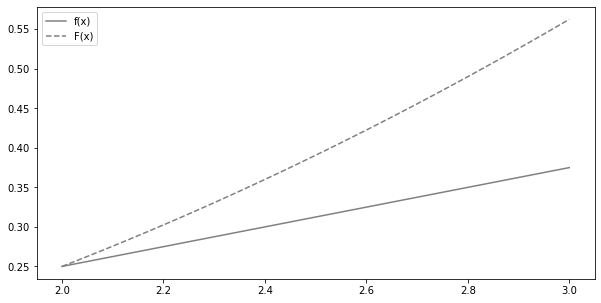

In [11]:
plot_prob(X, 2, 3)

### 1. 정규분포

In [51]:
#𝑍 ~ N(0,1) 정규화를 따른 정규분포
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

In [52]:
#X ~ N(2, 0.5^2 )
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [53]:
#기대값과 분산
check_prob(X)

기대값 E(X): 2.0
분산   V(X): 0.25


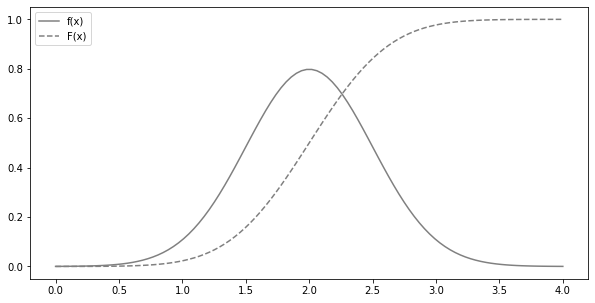

In [54]:
#정규분포 그래프: P(a <= X <= b) , a=0, b=4
plot_prob(X, 0, 4)

#### * scipy.stats에 있는 정규분포의 (norm)함수 사용하기

In [56]:
from scipy import stats

rv = stats.norm(2, 0.5)

In [57]:
rv.mean(), rv.var()

(2.0, 0.25)

In [58]:
#확률밀도함수
rv.pdf(2)   

0.7978845608028654

In [59]:
#확률분포함수 : P(X<=x) 
rv.cdf(1.7)

0.27425311775007355

In [60]:
#상위 100𝛼"%" 점:Z𝛼 인 꼬리확률: 백분위수를 Za 로 표시
rv.isf(0.3)   #상위 30%인 점

2.2622002563540207

In [61]:
#확률이 a가 되는 가운데 부분의 구간(면적)
rv.interval(0.9)   # 90%구간

#오른쪽과 왼쪽 5%씩 남는 구간과 같다.
rv.isf(0.95), rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

#### [예제] 

In [62]:
mu, sigma = 20, 4
X = N(mu, sigma)

In [63]:
#확률은
get_prob(X, 14, 25)

확률: 0.8275
